# Phase 1 - Milestone 1
    Name        : Pratama Waskito Prihandana
    class       : batch 003

# I. Introduction
______

Create a model for classification to predict default_payment_next_month from the saved dataset.

# II. Importing Library
____

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
import sklearn
import seaborn as sns

# III. Load Data
_____

The data source is taken from BigQuery from the dataset 'ml_datasets' and the database 'credit_card_default'.  
The syntax as below :
```
select
  limit_balance, 
  cast (sex as int) as sex, 
  cast (education_level as int) as education_level,
  cast (marital_status as int) as marital_status,
  age, 
  pay_0, 
  pay_2, 
  pay_3, 
  pay_4, 
  cast (pay_5 as float64) as pay_5,
  cast (pay_6 as float64) as pay_6, 
  bill_amt_1, 
  bill_amt_2, 
  bill_amt_3, 
  bill_amt_4, 
  bill_amt_5, 
  bill_amt_6, 
  pay_amt_1, 
  pay_amt_2, 
  pay_amt_3, 
  pay_amt_4, 
  pay_amt_5, 
  pay_amt_6, 
  cast (default_payment_next_month as int) as default_payment_next_month

from `bigquery-public-data.ml_datasets.credit_card_default`


  


In [2]:
# to display all column
pd.set_option('display.max_columns', None)

# define the dataset
df = pd.read_csv('h8dsft_P1M1_pratama.csv')

In [3]:
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,0.0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,192461.0,195970.0,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
3,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,133598.0,167378.0,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
4,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,0.0,160879.0,161797.0,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [4]:
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,30000.0,2,3,2,50.0,-1.0,-1.0,2.0,-1.0,-1.0,-2.0,178.0,1860.0,940.0,1110.0,0.0,0.0,1860.0,0.0,1110.0,0.0,0.0,0.0,1
2961,20000.0,2,1,2,25.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,2650.0,0.0,855.0,640.0,0.0,0.0,0.0,855.0,640.0,0.0,0.0,2742.0,0
2962,280000.0,2,1,2,52.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,886.0,0.0,930.0,0.0,0.0,0.0,0.0,930.0,0.0,0.0,0.0,0.0,0
2963,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1968.0,459.0,2500.0,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2964,100000.0,2,1,2,30.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,430.0,35993.0,2772.0,0.0,0.0,0.0,35993.0,2772.0,0.0,0.0,0.0,0.0,0


### Data size information

In [5]:
# data type info
df.dtypes

limit_balance                 float64
sex                             int64
education_level                 int64
marital_status                  int64
age                           float64
pay_0                         float64
pay_2                         float64
pay_3                         float64
pay_4                         float64
pay_5                         float64
pay_6                         float64
bill_amt_1                    float64
bill_amt_2                    float64
bill_amt_3                    float64
bill_amt_4                    float64
bill_amt_5                    float64
bill_amt_6                    float64
pay_amt_1                     float64
pay_amt_2                     float64
pay_amt_3                     float64
pay_amt_4                     float64
pay_amt_5                     float64
pay_amt_6                     float64
default_payment_next_month      int64
dtype: object

In [6]:
# descriptive statistic
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


In [7]:
# unique counts
df.nunique()

limit_balance                   59
sex                              2
education_level                  7
marital_status                   4
age                             49
pay_0                           11
pay_2                           10
pay_3                            9
pay_4                           10
pay_5                            9
pay_6                            8
bill_amt_1                    2643
bill_amt_2                    2592
bill_amt_3                    2549
bill_amt_4                    2504
bill_amt_5                    2482
bill_amt_6                    2461
pay_amt_1                     1415
pay_amt_2                     1372
pay_amt_3                     1302
pay_amt_4                     1214
pay_amt_5                     1194
pay_amt_6                     1189
default_payment_next_month       2
dtype: int64

In [8]:
# dataframe size
df.shape

(2965, 24)

### Missing values

In [9]:
# check missing value
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

In [10]:
# check duplicate
df[df.duplicated()].shape

(1, 24)

In [11]:
# drop dulicate
df = df.drop_duplicates()
df.reset_index().head()

,index,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,0.0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,2,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,192461.0,195970.0,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
3,3,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,133598.0,167378.0,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
4,4,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,0.0,160879.0,161797.0,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [12]:
# rename column
df = df.rename(columns={'default_payment_next_month': 'default_payment'})

In [13]:
# unique value in categorical columns

for i in df[list(df[['default_payment', 'sex', 'education_level', 'marital_status']])]:
    print(i, ':')
    print(df[i].value_counts())
    print('■' * 60)

default_payment :
0    2329
1     635
Name: default_payment, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
sex :
2    1801
1    1163
Name: sex, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
education_level :
2    1400
1    1038
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
marital_status :
2    1594
1    1331
3      35
0       4
Name: marital_status, dtype: int64
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■


### Categorical & Numerical data

In [14]:
# Categorical
cat_variables = [col for col in df.columns if df[col].nunique() <= 12]

# numerical
num_variables = [col for col in df.columns if df[col].nunique() > 12]

The assumption of splitting the data between categorical and numerical is that based on numerical variable; discrette or contiuous.  

The discrette numerical data is that the max of nunique is same or less than 12 such as sex, education, marrital status, and payment date.  

The continuous numerical data is that the max of nunique can contains more than 12, which means can be infinite such sum of money or payment amount.

Why 12? The max of discrette numerical data is based on the max month.

In [15]:
cat_variables

['sex',
 'education_level',
 'marital_status',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'default_payment']

In [16]:
num_variables

['limit_balance',
 'age',
 'bill_amt_1',
 'bill_amt_2',
 'bill_amt_3',
 'bill_amt_4',
 'bill_amt_5',
 'bill_amt_6',
 'pay_amt_1',
 'pay_amt_2',
 'pay_amt_3',
 'pay_amt_4',
 'pay_amt_5',
 'pay_amt_6']

# IV. Exploratory Data Analaysis (EDA)

The dataset contains all numerical as we have seen above, but some features are considered as discrette numerical because the number are limited the the various of variable such as sex, marital status, education level, and default payment. Each number represents single variable of features.


([<matplotlib.patches.Wedge at 0x2294d2d6c80>,
 [Text(-1.7202369611388333, 1.3714170764329257, 'No'),
  Text(1.7202369611388324, -1.3714170764329268, 'Yes')],
 [Text(-0.9383110697120907, 0.7480456780543231, '78.6%'),
  Text(0.9383110697120903, -0.7480456780543235, '21.4%')])

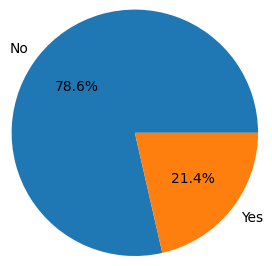

In [17]:
# default count
plt.figure(figsize=(2,2))
def_count = df['default_payment'].value_counts()
plt.pie(def_count,labels=['No','Yes'],autopct='%0.1f%%',radius=2)

Assume that :  
0 is no  
1 is yes


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_13296\3006678830.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['limit_balance'])


<AxesSubplot: xlabel='limit_balance', ylabel='Density'>

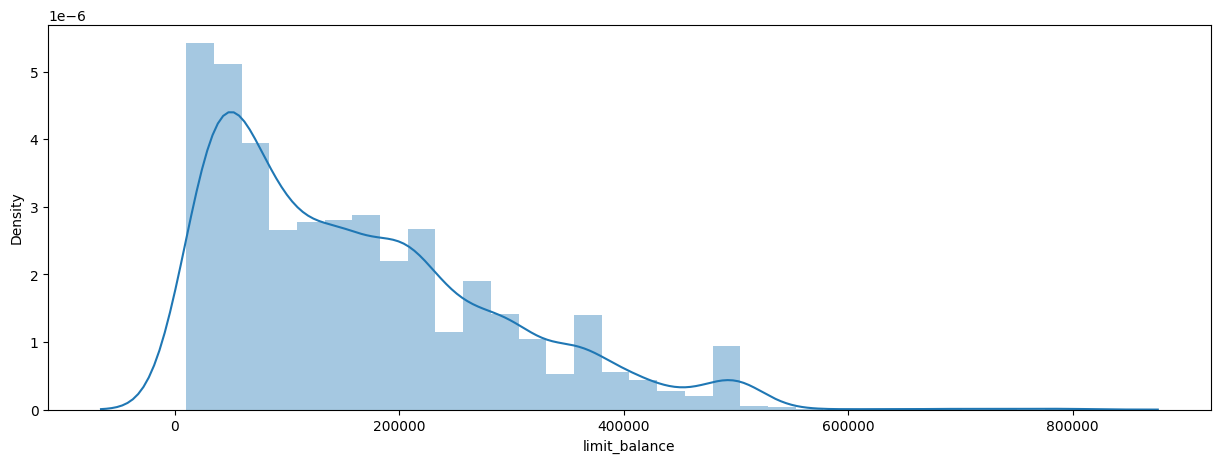

In [18]:
# limit balance data distribution

plt.figure(figsize=(15,5))
sns.distplot(df['limit_balance'])

```Insight :```  
The credit card limit provided is right skewed since the bank doesn't provide higher credit limit to all their customers.

### Finding correlation using PhiK matrix

In [19]:
# correlation value with PhiK according to income_bracket
phik_value = df.phik_matrix().default_payment
phik_value.sort_values(ascending=False)

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment']


default_payment    1.000000
pay_0              0.596572
pay_2              0.468335
pay_6              0.386559
pay_3              0.334726
pay_4              0.318688
pay_5              0.315415
limit_balance      0.191907
bill_amt_4         0.087360
education_level    0.085359
pay_amt_3          0.083774
bill_amt_1         0.073974
bill_amt_3         0.073073
age                0.067038
bill_amt_2         0.064086
pay_amt_4          0.062588
pay_amt_1          0.046866
pay_amt_5          0.022282
marital_status     0.020055
bill_amt_5         0.019495
sex                0.015281
pay_amt_2          0.004992
bill_amt_6         0.000000
pay_amt_6          0.000000
Name: default_payment, dtype: float64

### Categorical data exploration

In [20]:
# define plot according to default_payment

def cat_plot(cat_variables):
    
    cat_var_groupby = df.groupby(cat_variables)['default_payment'].mean()
    
    # count plot    
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    print(df[cat_variables].value_counts())
    sns.countplot(x=cat_variables,data=df,order=cat_var_groupby.index);


#### Gender according to default_payment

2    1801
1    1163
Name: sex, dtype: int64


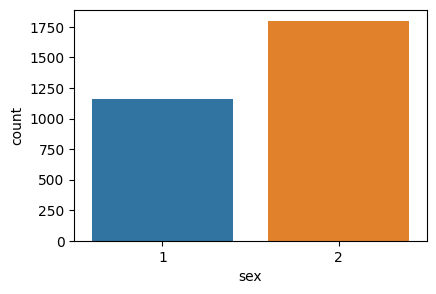

In [21]:
cat_plot('sex')

assume that :  
1 = male  
2 = female

Male has a higher chance on default to card card bills than female.

#### Marital status according to default_payment

2    1594
1    1331
3      35
0       4
Name: marital_status, dtype: int64


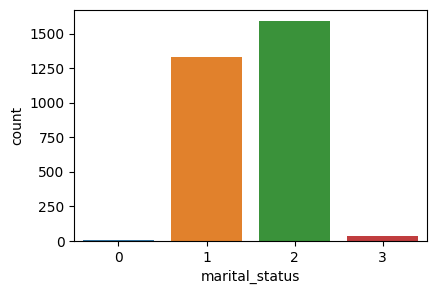

In [22]:
cat_plot('marital_status')

Assume that :  
1 = single  
2 = married  
3 = divorce  
4 = other  

Married person has the highest chance on defaulting payment

#### Education level according to default payment

2    1400
1    1038
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64


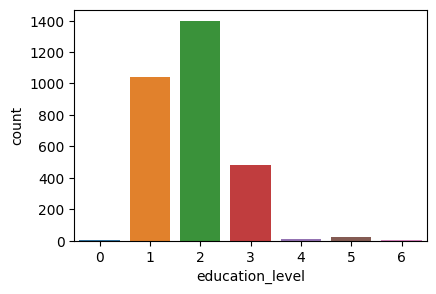

In [23]:
cat_plot('education_level')

 0.0    1516
-1.0     540
 1.0     355
 2.0     262
-2.0     247
 3.0      29
 4.0       7
 8.0       3
 5.0       2
 7.0       2
 6.0       1
Name: pay_0, dtype: int64


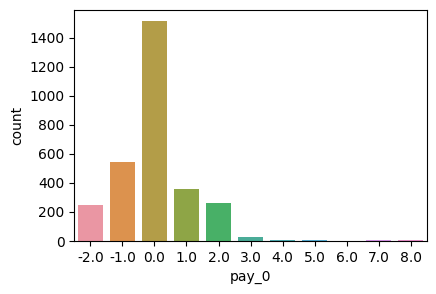

In [24]:
cat_plot('pay_0')

 0.0    1607
-1.0     580
 2.0     374
-2.0     352
 3.0      32
 4.0       8
 1.0       4
 7.0       3
 5.0       2
 6.0       2
Name: pay_2, dtype: int64


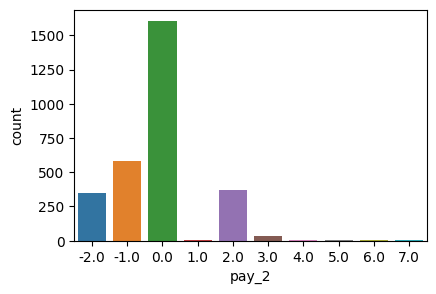

In [25]:
cat_plot('pay_2')

 0.0    1610
-1.0     580
 2.0     368
-2.0     366
 3.0      22
 4.0       8
 6.0       4
 7.0       3
 5.0       3
Name: pay_3, dtype: int64


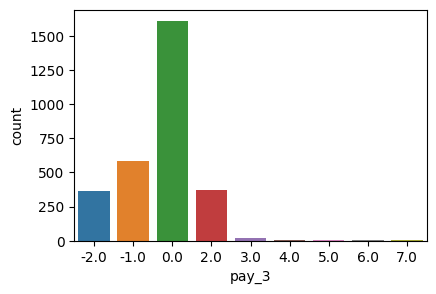

In [26]:
cat_plot('pay_3')

 0.0    1667
-1.0     532
-2.0     407
 2.0     324
 3.0      14
 4.0       7
 7.0       6
 5.0       5
 6.0       1
 8.0       1
Name: pay_4, dtype: int64


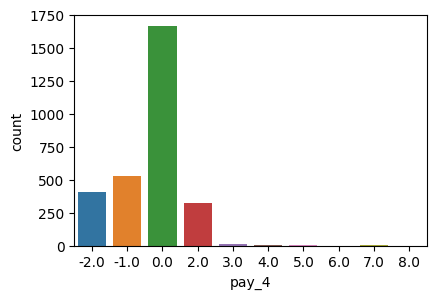

In [27]:
cat_plot('pay_4')

 0.0    1702
-1.0     504
-2.0     440
 2.0     280
 3.0      19
 4.0       9
 7.0       7
 5.0       2
 6.0       1
Name: pay_5, dtype: int64


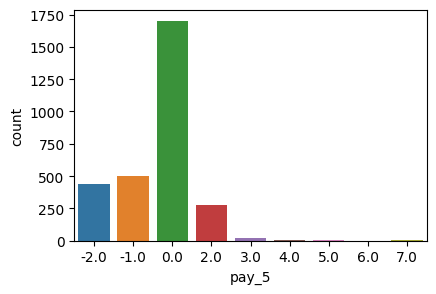

In [28]:
cat_plot('pay_5')

 0.0    1626
-1.0     540
-2.0     469
 2.0     297
 3.0      21
 7.0       6
 6.0       3
 4.0       2
Name: pay_6, dtype: int64


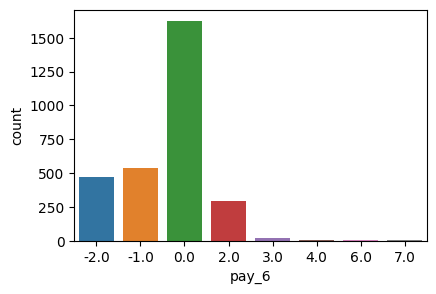

In [29]:
cat_plot('pay_6')

In [30]:
cat_variables

['sex',
 'education_level',
 'marital_status',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'default_payment']

### Numerical data according to default_payment

In [1]:
warnings.filterwarnings("ignore", category=UserWarning)
plt.figure(figsize=(12,10))
plt.rcParams['figure.figsize']=(15,22)
fig,axes = plt.subplots(7,2)

k = 0

for i in range(len(axes)):
    for j in range(len(axes[0])):
        sns.kdeplot(ax = axes[i][j], x=num_variables[k], data=df, hue='default_payment', fill=True)
        k += 1
        if k >= 14: break
    
plt.plot()

NameError: name 'warnings' is not defined

### Correlation Matrix

<AxesSubplot: >

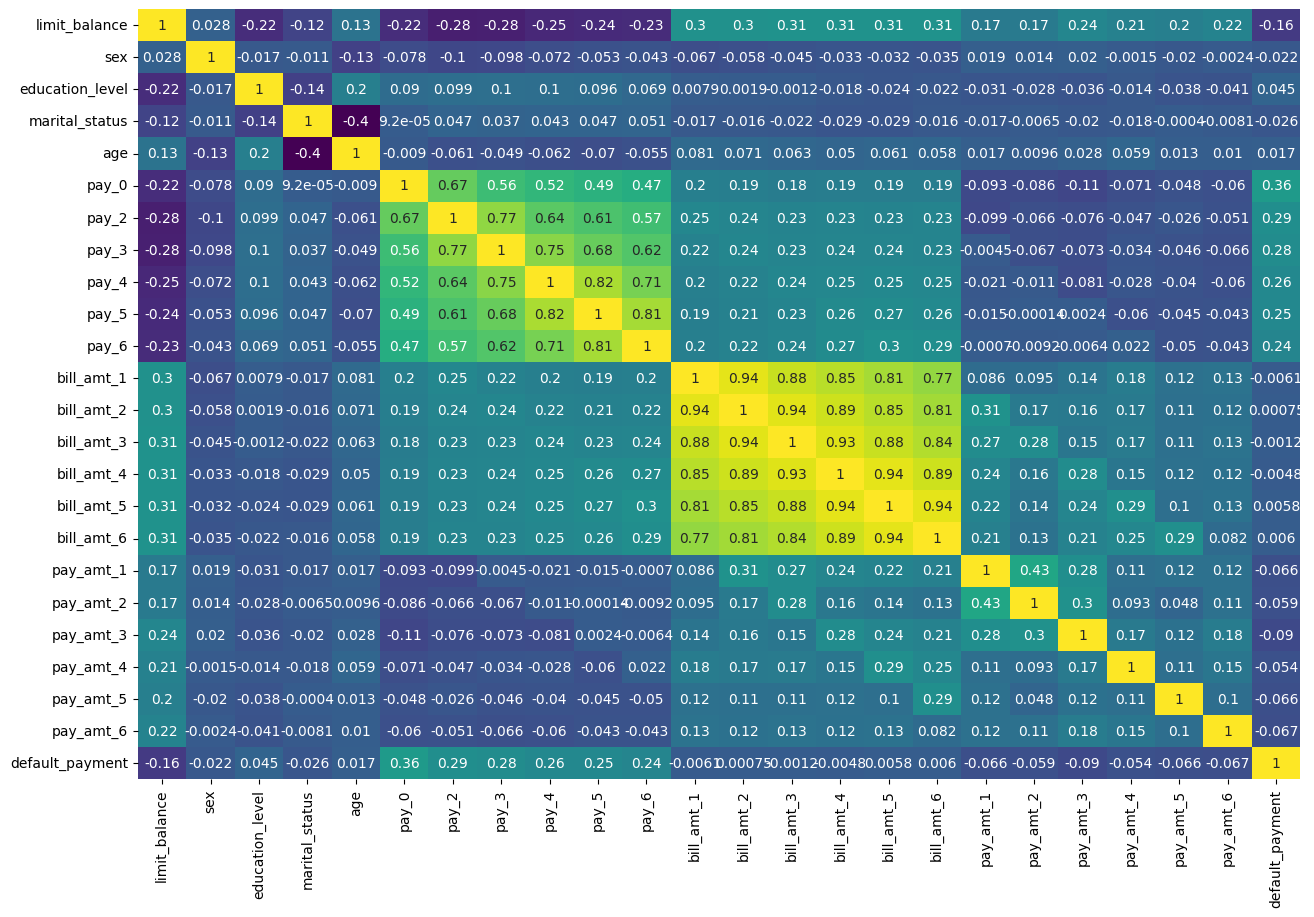

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cbar=False,annot=True, cmap='viridis')

# V. Data Pre-processing

### Spliting Data set

In [33]:
# assign dataset for train and test

data_train_test = df

In [34]:
# Split to target (y) and feature (x)

x = data_train_test.drop('default_payment', axis=1)
y = data_train_test['default_payment']

In [35]:
# split to train-set and test-set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69)

print('Train Size : ', x_train.shape)
print('Test Size  : ', x_test.shape)

Train Size :  (2371, 23)
Test Size  :  (593, 23)


In [36]:
# apply scaler to the numerical column

scaler = MinMaxScaler()
scaler.fit(x_train)
scaler.fit(x_test)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [37]:
```
#  array column in train-set
num_col = [col for col in x.columns if x[col].nunique() > 12]
cat_col = [col for col in x.columns if x[col].nunique() <= 12]

# numerical and categorical dataframe in train-set
x_train_num = x_train[num_col]
x_train_cat = x_train[cat_col]

# numerical and categorical dataframe in test-set
x_test_num = x_test[num_col]
x_test_cat = x_test[cat_col]

SyntaxError: invalid syntax (1626793446.py, line 1)

In [ ]:
x_train_num.head()

In [ ]:
x_train_cat.head()

In [ ]:
x_test_num.head()

In [ ]:
x_test_cat.head()

### Handling Outlier

In [ ]:
# Check outliers in numerical data

x[num_col].plot.box(title='X outlier')
print('skewness :')
print(x[num_col].skew())

In [ ]:
# drop outlier
    
q1, q3 = np.percentile(x[num_col], [25, 75])
iqr = q3 - q1
upper  = q3 + 3 * iqr
lower = q1 - 3 * iqr
x = x[(x[num_col] >= lower) & (x[num_col]<= upper)]
    
x.plot.box(title='X outlier')
print('skewness :')
print(x.skew())

```Disclaimer :```  
There are still outliers after we have cleaned them.  
Cleaning outliers twice would mean identifying and removing data points that fall outside of a pre-defined range of values twice. This could be useful if the first round of outlier removal was not thorough enough and there were still outliers present in the data. However, it could also lead to the removal of valid data points if the criteria for identifying outliers is too strict. Additionally, removing outliers from the data multiple times can lead to a loss of information and could affect the overall accuracy and representativeness of the data set.

In [ ]:
# Check skewness and distribution after dropping outliers

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x[num_col], bins=30,kde=True)
plt.title('x distribution after outlier')
print(x[num_col].skew())

# VI. Machine Learning Model

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=123)
dtc.fit(x_train, y_train)
pred_1=dtc.predict(x_test)

from sklearn import metrics
accur_1 = metrics.accuracy_score(y_test, pred_1)
prec_1 = metrics.precision_score(y_test, pred_1)
recc_1 = metrics.recall_score(y_test, pred_1)
f_1 = metrics.f1_score(y_test, pred_1)

list_models = []
list_accur = []
list_prec = []
list_recc = []
list_f1 = []

list_models.append('DecisionTree')
list_accur.append(accur_1)
list_prec.append(prec_1)
list_recc.append(recc_1)
list_f1.append(f_1)

In [ ]:
print('accuracy', accur_1)
print('precision', prec_1)
print('f1 score', f_1)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=123)
rfc.fit(x_train, y_train)
pred_2 = rfc.predict(x_test)

accur_2 = metrics.accuracy_score(y_test, pred_2)
prec_2 = metrics.precision_score(y_test, pred_2)
recc_2 = metrics.recall_score(y_test, pred_2)
f_2 = metrics.f1_score(y_test, pred_2)
list_models.append('RandomForest')
list_accur.append(accur_2)
list_prec.append(prec_2)
list_recc.append(recc_2)
list_f1.append(f_2)

In [ ]:
print('accuracy', accur_2)
print('precision', prec_2)
print('f1 score', f_2)